In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
from auto_encoder import AutoEncoder
from stacked_mnist import StackedMNISTData, DataMode
import numpy as np
import matplotlib.pyplot as plt
from verification_net import VerificationNet
from utils import display_images

# Setting up model

In [14]:
auto_encoder = AutoEncoder(latent_dim=20)
auto_encoder.model.summary()
auto_encoder.train(force_relearn=True)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 48)        480       
                                                                 
 conv2d_14 (Conv2D)          (None, 6, 6, 64)          27712     
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               295040    
                                                                 
 dense_25 (Dense)            (None, 20)                2580      
                                                                 
 input_20 (InputLayer)       multiple                  0  

In [ ]:
auto_encoder.train(force_relearn=True)

# Mono images

In [15]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

### Reconstruction results

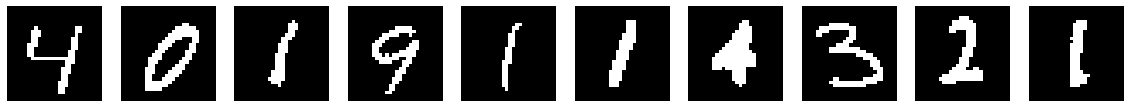

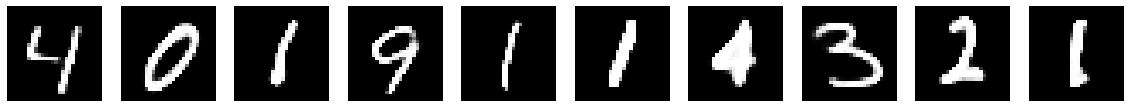

In [18]:
reconstructed = auto_encoder.reconstruct(x_test)

display_images(x_test, 10)
display_images(reconstructed, 10)

In [19]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")


/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Accuracy of Reconstruction: 95.60%


### Auto-Encoder as a generator

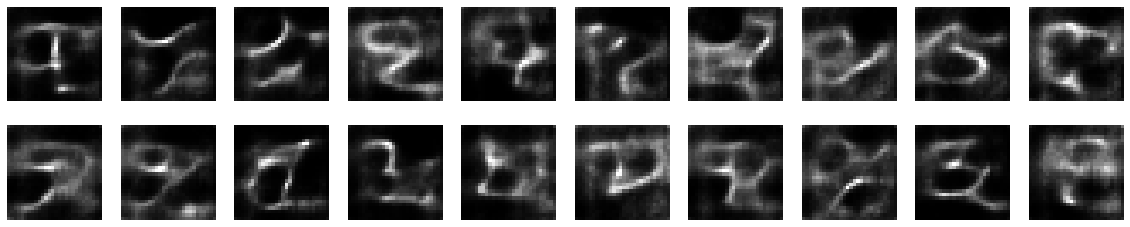

In [20]:
generated = auto_encoder.generate_new_samples()
display_images(generated, 20)

In [22]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 20.00%
Predictability: 92.50%


# Color images

In [23]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

### Reconstruction results

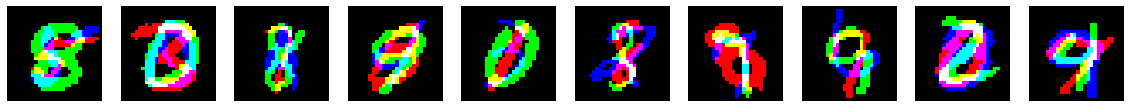

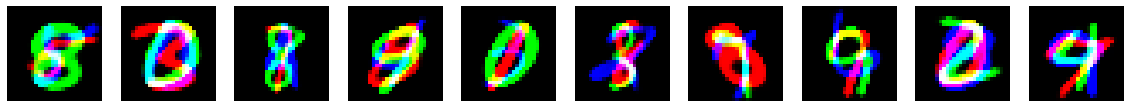

In [24]:
reconstructed = auto_encoder.reconstruct(x_test)

display_images(x_test, 10, color=True)
display_images(reconstructed, 10, color=True)

In [25]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test, tolerance=0.5)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")

Accuracy of Reconstruction: 91.60%


### Auto-Encoder as a generator

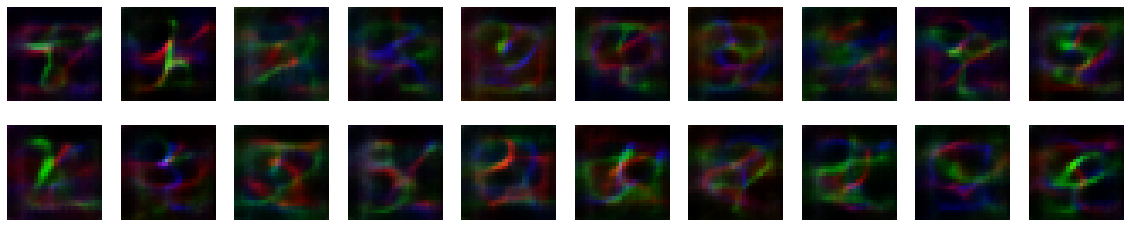

In [26]:
generated = auto_encoder.generate_new_samples(no_channels=3)
display_images(generated, 20, color=True)

In [27]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 0.10%
Predictability: 75.80%


# Auto-Encoder as anomaly detector

In [10]:
ae_anomaly = AutoEncoder(latent_dim=20, missing=True)
ae_anomaly.train(force_relearn=True)

Epoch 1/10
424/424 [==============================] - 34s 79ms/step - loss: 0.1806 - val_loss: 0.0994
Epoch 2/10
424/424 [==============================] - 31s 72ms/step - loss: 0.0776 - val_loss: 0.0770
Epoch 3/10
424/424 [==============================] - 30s 70ms/step - loss: 0.0630 - val_loss: 0.0666
Epoch 4/10
424/424 [==============================] - 31s 73ms/step - loss: 0.0565 - val_loss: 0.0613
Epoch 5/10
424/424 [==============================] - 31s 74ms/step - loss: 0.0528 - val_loss: 0.0608
Epoch 6/10
424/424 [==============================] - 34s 80ms/step - loss: 0.0505 - val_loss: 0.0595
Epoch 7/10
424/424 [==============================] - 31s 74ms/step - loss: 0.0487 - val_loss: 0.0589
Epoch 8/10
424/424 [==============================] - 37s 87ms/step - loss: 0.0472 - val_loss: 0.0550
Epoch 9/10
424/424 [==============================] - 33s 77ms/step - loss: 0.0459 - val_loss: 0.0580
Epoch 10/10
424/424 [==============================] - 31s 72ms/step - loss: 0.045

### Mono images

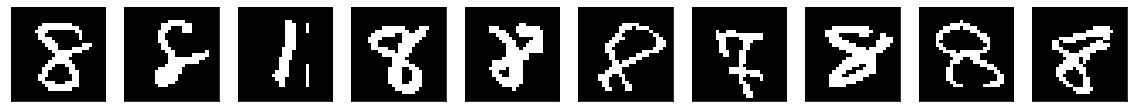

In [11]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

anomalies = ae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10)

### Color images

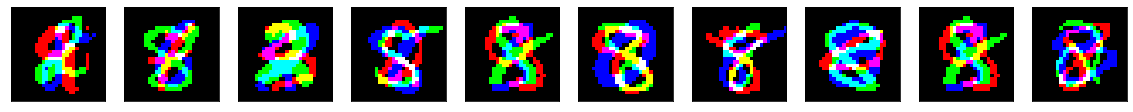

In [13]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

anomalies = ae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10, color=True)